## Set up of files

#unzip the tar file

In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import glob

In [2]:
#%%bash 
#tar -xvf BYxRM_segs_saccer3.bam.simplified.vcf.xz

In [3]:
#see what chromosomes are in the VCF file
test = '/Users/cmdb/qbb2020-answers/assignment3/BYxRM_segs_saccer3.bam.simplified.vcf'
uniqChrom = set()
f = open(test, 'r')
for line in f: 
    #skip header
    if "#" in line:
        continue
        
    line = line.rstrip('\r\n').split('\t')
    chromosome = line[0]
    uniqChrom.add(str(chromosome))

print(uniqChrom)
f.close()

{'chrIV', 'chrVII', 'chrXVI', 'chrII', 'chrM', 'chrIX', 'chrV', 'chrVIII', 'chrX', 'chrXI', 'chrXIII', 'chrXIV', 'chrIII', 'chrI', 'chrVI', 'chrXII', 'chrXV'}


In [4]:
#substitute chromosome in vcf file with number

In [5]:
%%bash
awk '{gsub("chrIII","3");gsub("chrIV","4");gsub("chrII","2");gsub("chrXIII","13");gsub("chrXIV","14");gsub("chrXII","12");gsub("chrVIII","8");gsub("chrVII","7");gsub("chrXI","11");gsub("chrXVI","16");gsub("chrVI","6");gsub("chrXV","15"); gsub("chrIX","9");gsub("chrM","M");gsub("chrV","5");gsub("chrI","1");gsub("chrX","10");print}' /Users/cmdb/qbb2020-answers/assignment3/BYxRM_segs_saccer3.bam.simplified.vcf > simplified.vcf


In [6]:
test = '/Users/cmdb/qbb2020-answers/assignment3/simplified.vcf'
uniqChrom = set()
f = open(test, 'r')
for line in f: 
    #skip header
    if "#" in line:
        continue
        
    line = line.rstrip('\r\n').split('\t')
    chromosome = line[0]
    uniqChrom.add(str(chromosome))

print(uniqChrom)
f.close()

{'3', '13', '14', '16', 'M', '15', '5', '6', '7', '8', '12', '2', '11', '1', '4', '10', '9'}


## Part 1

Visualize genetic relatedness between the strains by performing PCA and plotting the first two components.

In [7]:
%%bash
plink \
  --vcf simplified.vcf \
  --pca \
  --mind #\
  #--allow-extra-chr

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --mind
  --pca
  --vcf simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%

In [8]:
#FID = family ID
#SID = sample ID
col = ['FID', 'SID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
pca_output_df = pd.read_csv("plink.eigenvec", sep = " ", header = None, names = col)
pca_output_df


,FID,SID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


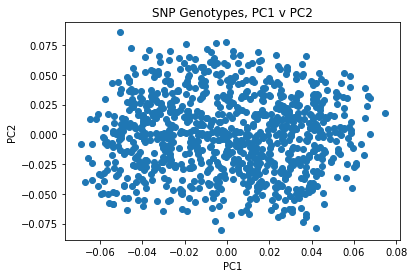

In [9]:
#plot out PC1 vs PC2 in a scatterplot
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title("SNP Genotypes, PC1 v PC2")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
#plt.savefig('pca.png')
plt.show()

## Part 2

Visualize the allele frequency spectrum by plotting a histogram of allele frequencies.

In [10]:
inputfile = '/Users/cmdb/qbb2020-answers/assignment3/simplified.vcf' 


f = open(inputfile, 'r')
alleleFreqs = []
i = 0
for line in f:
    
    #skip header
    if "#" in line:
        continue
    
    line = line.rstrip('\r\n').split('\t')
    #info fields is the 8th column or the 7th index
    info = line [7]
    

    #allele frequence is "AF" in info fields
    
    infoFields = info.split(';')
    for field in infoFields:
        if "AF" in field:
 
            alleleFreq = field
            alleleFreq = alleleFreq.split('=')
            frequencies = (alleleFreq[1])


            #handle multi-allelic frequencies, there are 7 in this VCF file
            frequencies = frequencies.split(',')
            for frequency in frequencies:
                alleleFreqs.append(float(frequency))
        else:
            print('NO ALLELE FREQUENCY FOUND')
         
f.close()

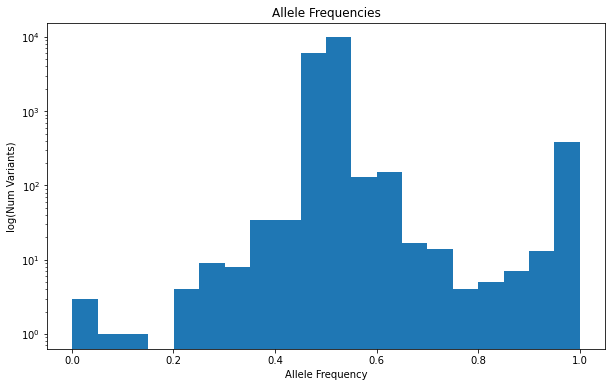

In [11]:
fig,ax = plt.subplots(ncols = 1, figsize = (10, 6))
ax.hist(alleleFreqs, bins = 20)

ax.set_title("Allele Frequencies")
ax.set_ylabel("log(Num Variants)")
ax.set_xlabel("Allele Frequency")
#plt.savefig('allele_freq.png')
ax.set_yscale("log")


## Part 3 

Perform quantitative association testing for each phenotype

In [12]:
#format the phenotype file header + rest of the lines with family ID and individual ID

formattedPheno = open('formatted_pheno.txt', 'w')
phenotypeFile = '/Users/cmdb/qbb2020-answers/assignment3/BYxRM_PhenoData.txt'
header_flag = 0
with open(phenotypeFile, 'r') as f:
    for line in f:
        if header_flag == 0:
            currFields = line
            currFields = currFields.split('\t')
            currFields[0] = 'IID'
            currFields.insert(0, 'FID')
            new_header = ''
            for element in currFields:
                if new_header == '':
                    new_header = new_header + element
                    continue
                else:
                    new_header = new_header + '\t' + element
            formattedPheno.write(new_header) 
            header_flag = 1
            continue
        
        formattedLine = line.replace('_', '\t')
        formattedPheno.write(formattedLine)
    
        
formattedPheno.close()

In [13]:
%%bash
plink \
  --vcf /Users/cmdb/qbb2020-answers/assignment3/simplified.vcf \
  --pheno /Users/cmdb/qbb2020-answers/assignment3/formatted_pheno.txt \
  --linear \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --all-pheno
  #--allow-extra-chr \
  

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno /Users/cmdb/qbb2020-answers/assignment3/formatted_pheno.txt
  --vcf /Users/cmdb/qbb2020-answers/assignment3/simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies

## Part 4

For each phenotype, produce a QQ plot and Manhattan plot

In [14]:
pheno_assoc_files = glob.glob("/Users/cmdb/qbb2020-answers/assignment3/plink.*.assoc.linear")

In [15]:
print(len(pheno_assoc_files))

46


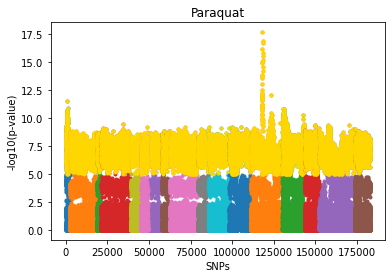

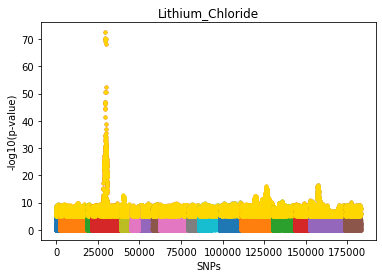

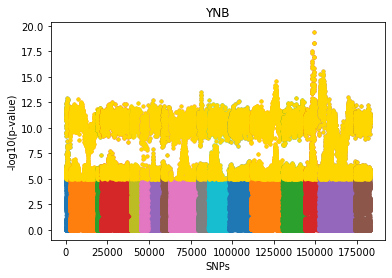

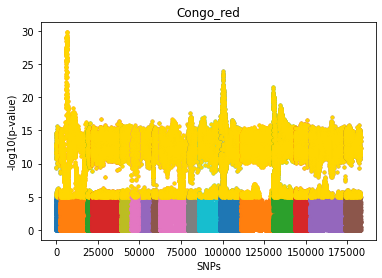

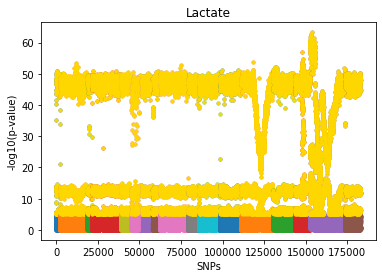

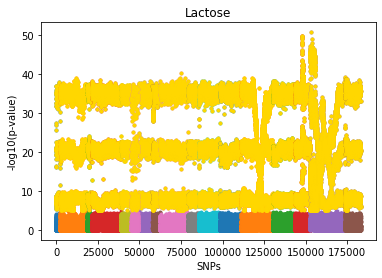

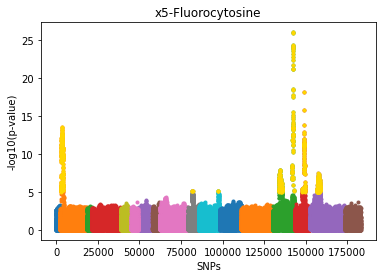

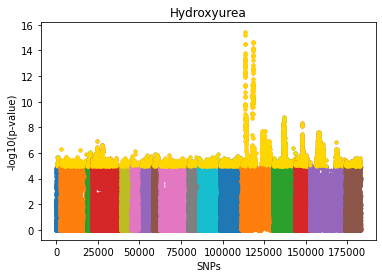

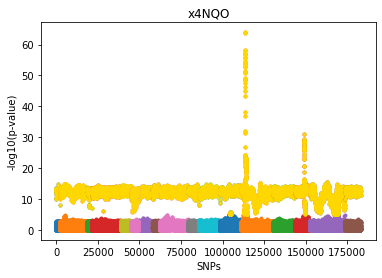

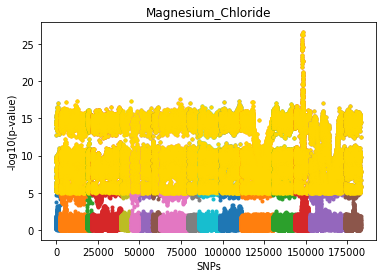

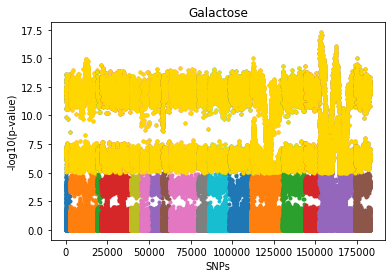

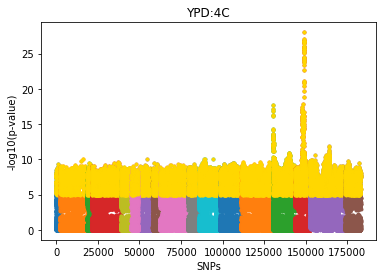

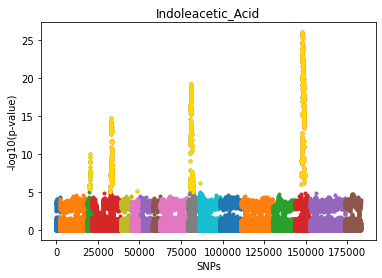

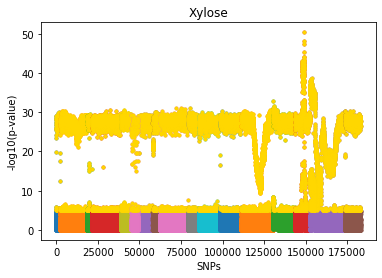

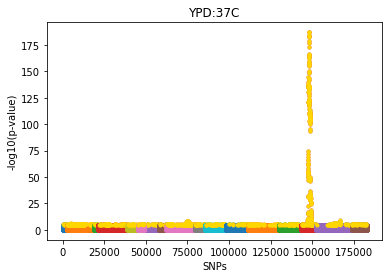

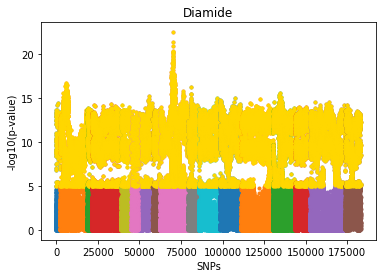

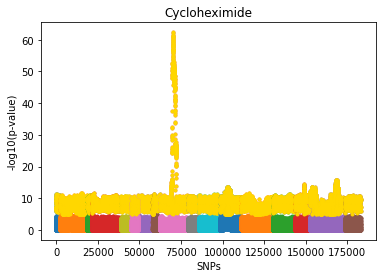

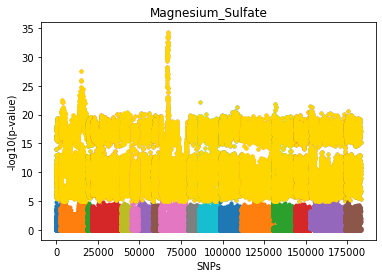

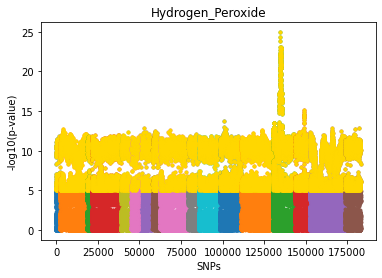

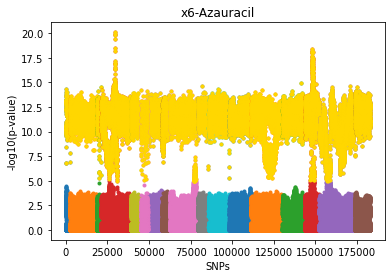

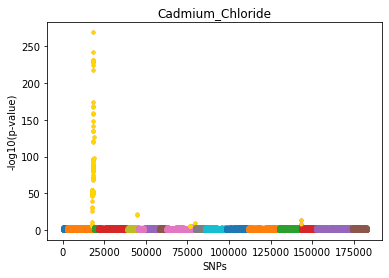

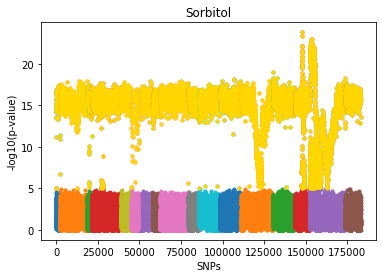

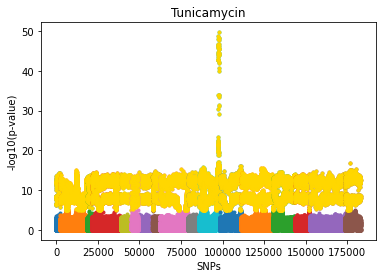

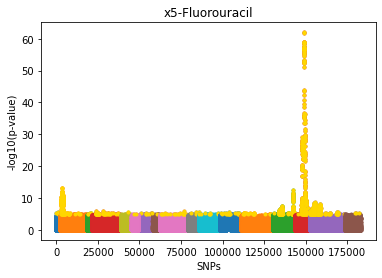

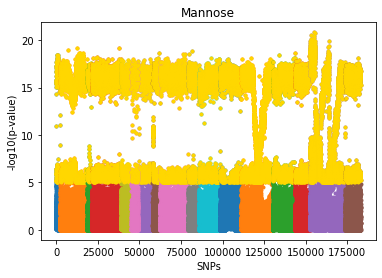

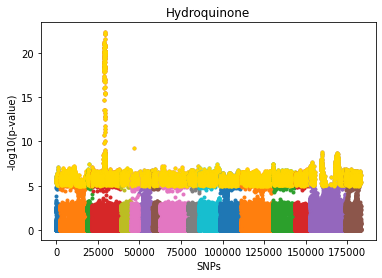

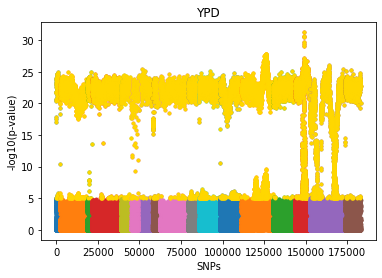

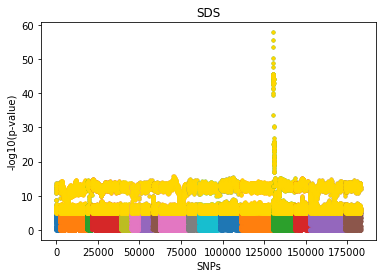

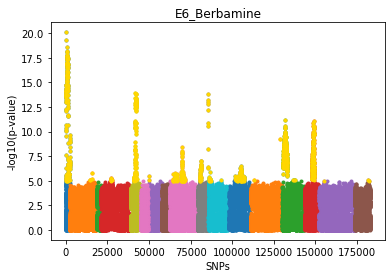

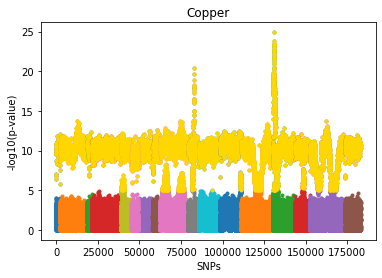

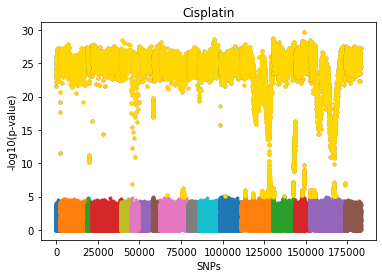

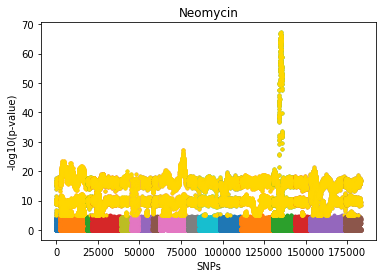

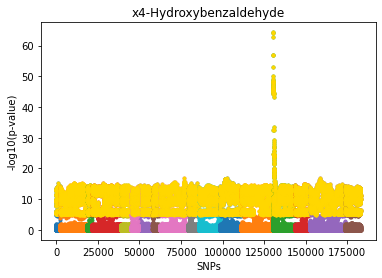

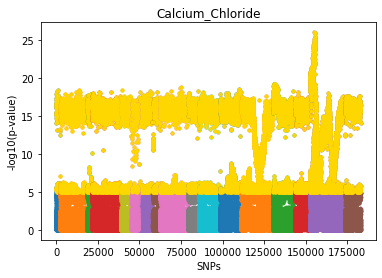

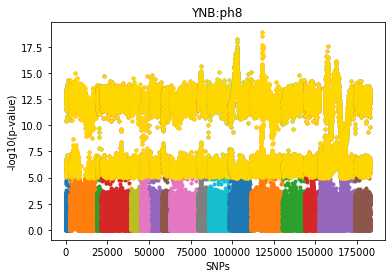

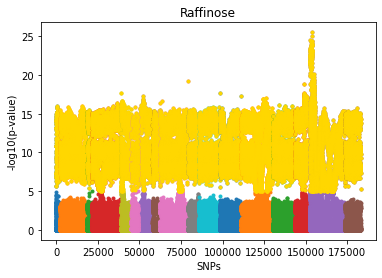

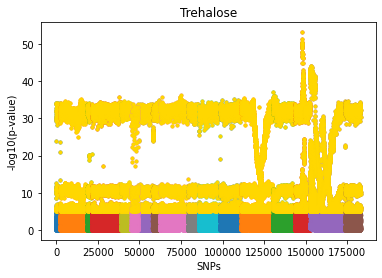

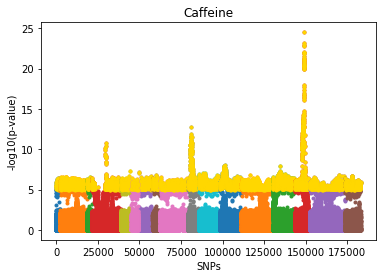

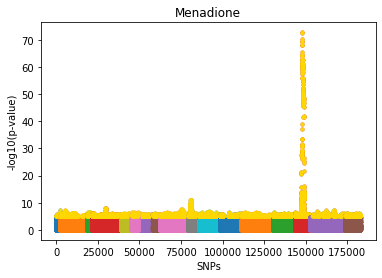

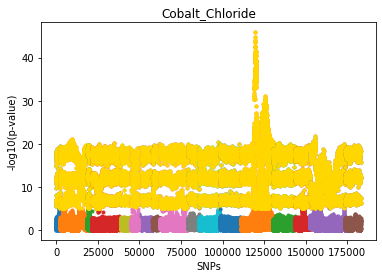

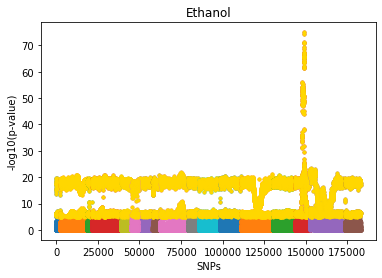

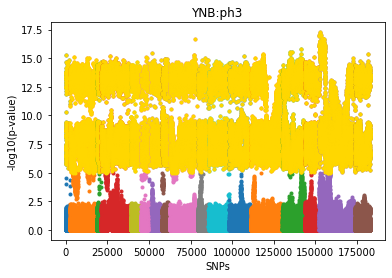

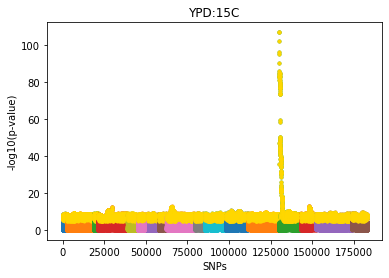

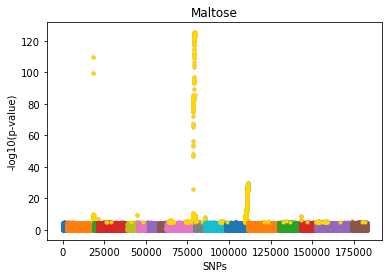

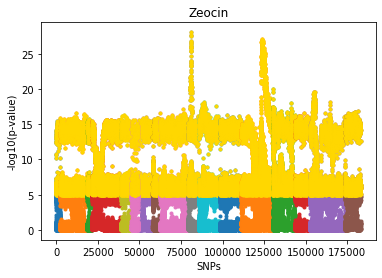

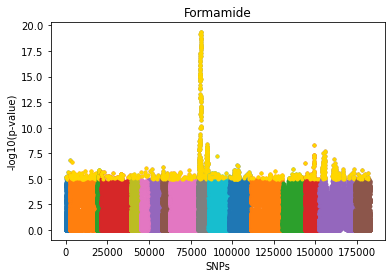

In [16]:
#i = 0
for assoc_file in pheno_assoc_files:
    gwas = pd.read_csv(assoc_file, sep = "\s+")

    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    
    #dataframe of all insignificant SNPs with p-value > 10^-5
    gwas_insignificant = gwas[gwas['logP']>5]

    #get all unique chr labels
    allchr = gwas["CHR"]
    list_of_chr = allchr.tolist()
    chr_set = set(list_of_chr)
    uniq_chr_list = list(chr_set)    


    fig,ax = plt.subplots()

    
    #grab phenotype from filename 
    directories = assoc_file.split('/')
    file = directories [-1]
    file_parts = file.split('.')
    phenotype = file_parts[1]

    
    #generate a unique scatter plot for each phenotype
    
    for chr in uniq_chr_list: 
        ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.') 
        ax.scatter(gwas_insignificant["snp_index"][gwas_insignificant["CHR"] == chr],
                   gwas_insignificant["logP"][gwas_insignificant["CHR"] == chr], color='gold', marker='.')
 
        
        
       
    plt.title(phenotype)
    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    #plt.savefig('Manhattan.png')
    
    plt.show()
    
    


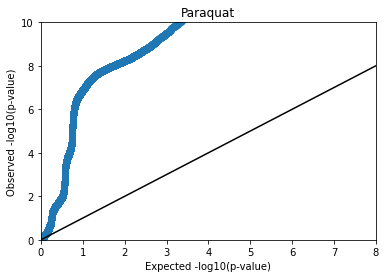

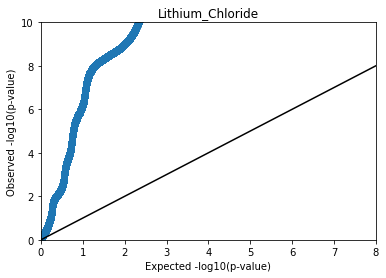

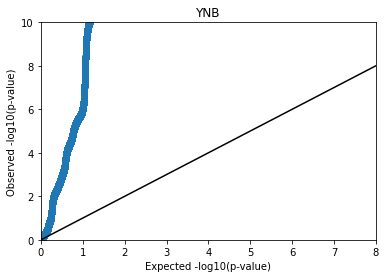

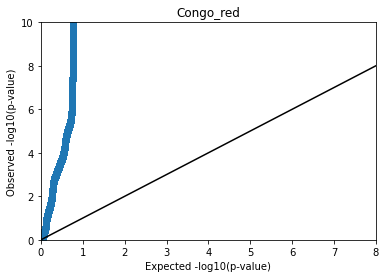

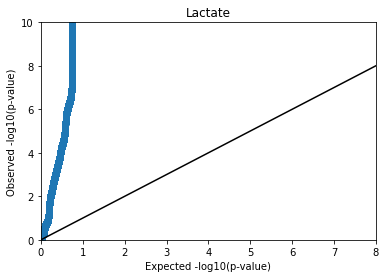

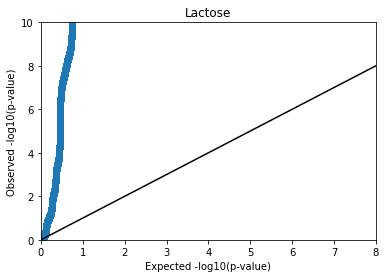

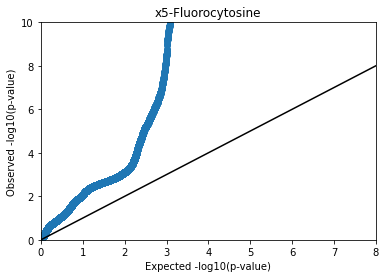

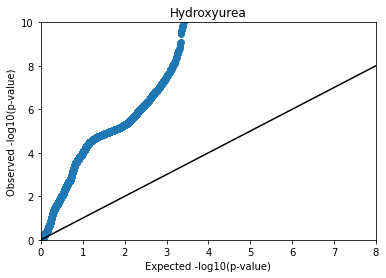

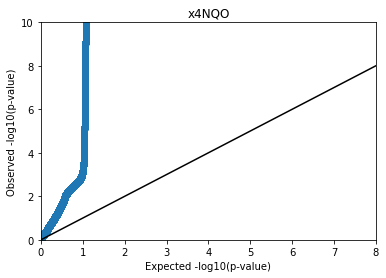

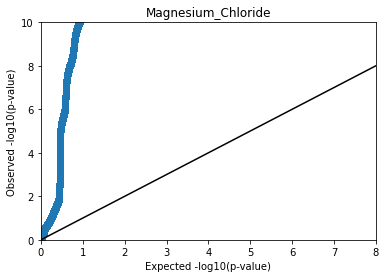

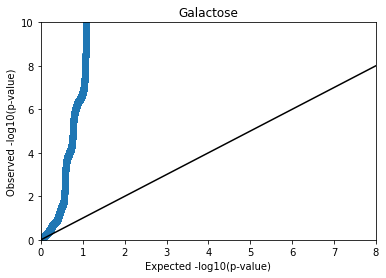

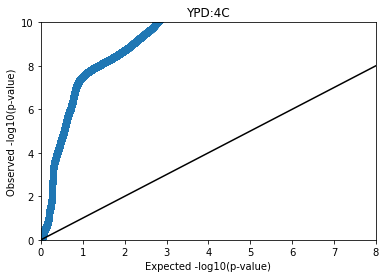

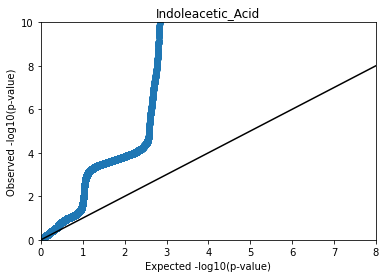

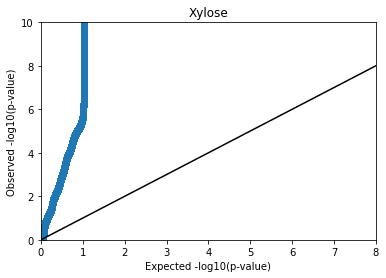

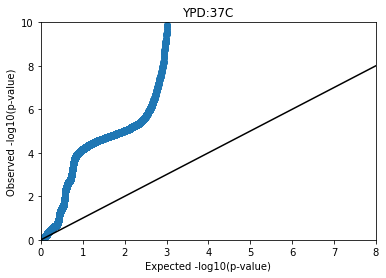

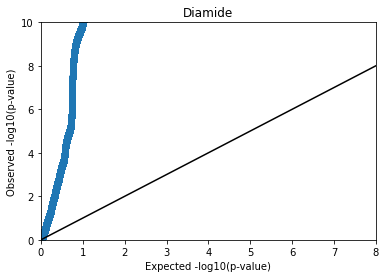

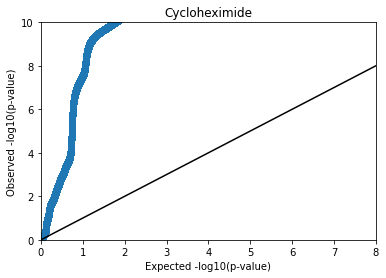

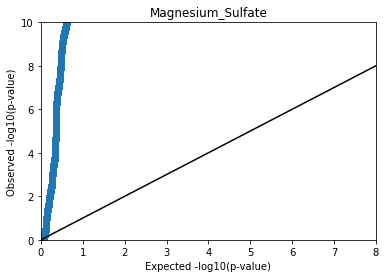

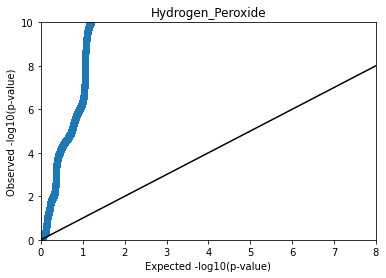

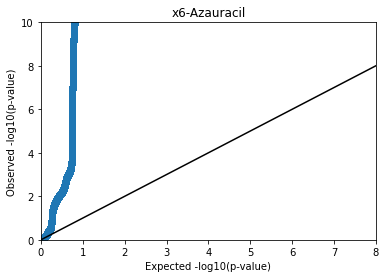

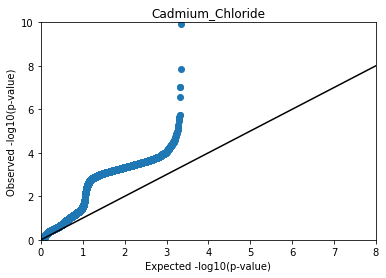

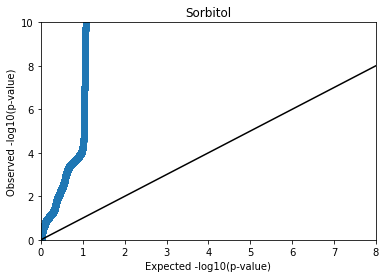

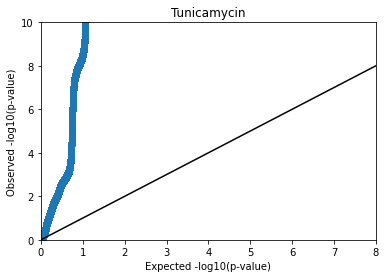

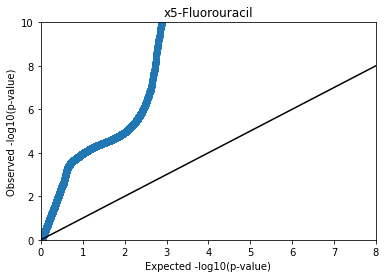

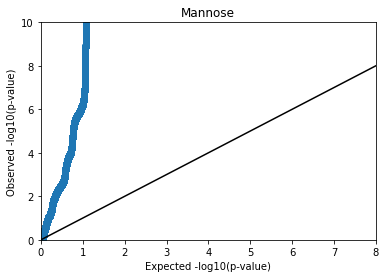

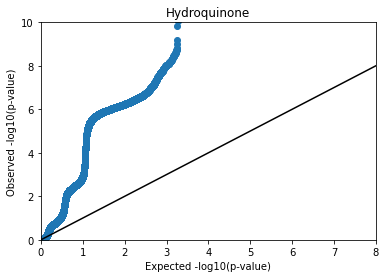

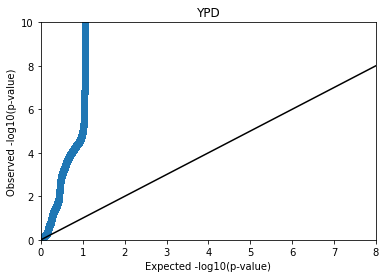

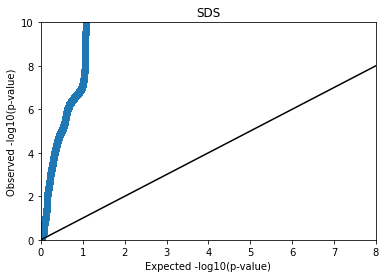

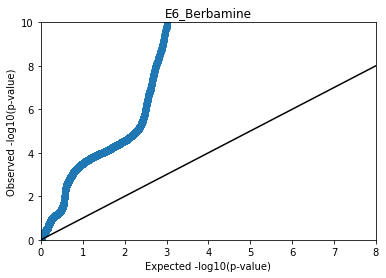

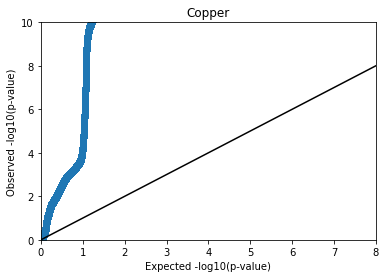

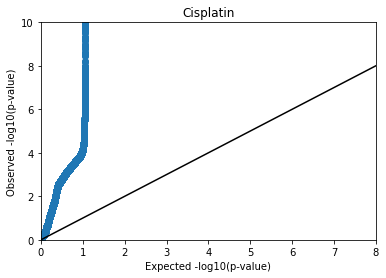

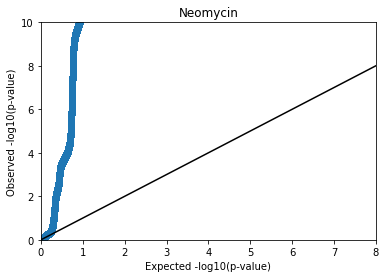

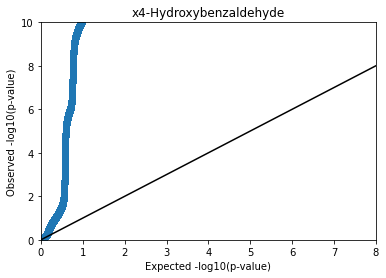

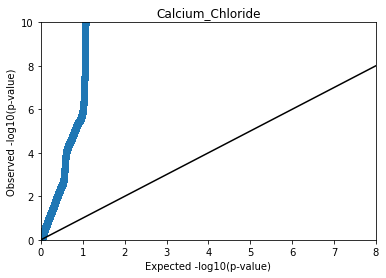

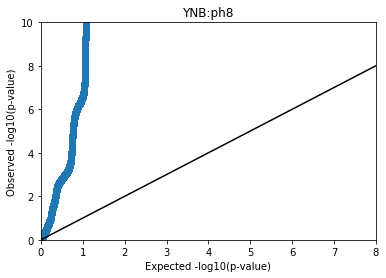

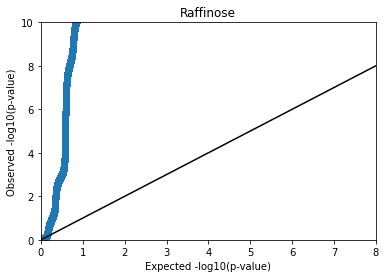

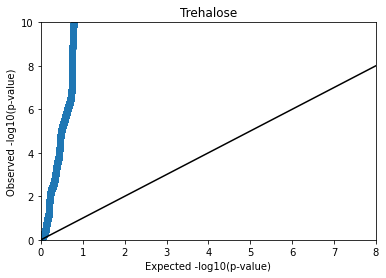

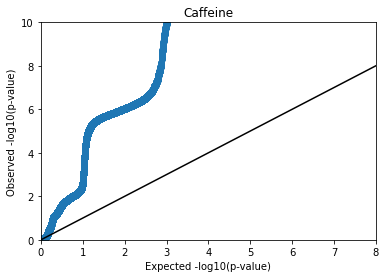

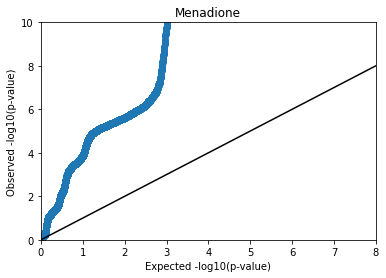

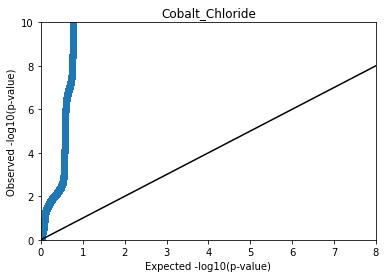

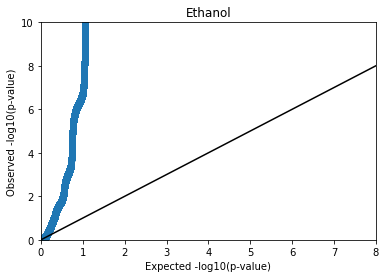

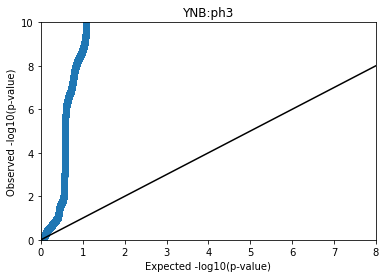

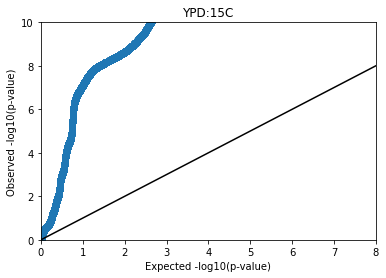

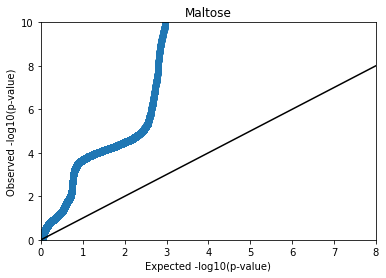

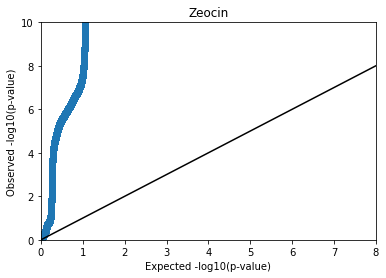

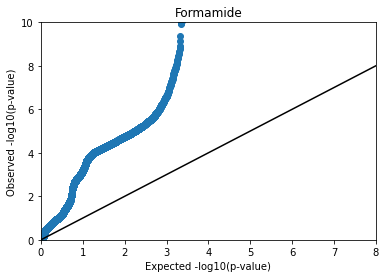

In [17]:
for assoc_file in pheno_assoc_files:
    gwas = pd.read_csv(assoc_file, sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])


    #grab phenotype from filename 
    directories = assoc_file.split('/')
    file = directories [-1]
    file_parts = file.split('.')
    phenotype = file_parts[1]
    
    fig, ax = plt.subplots()

    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")
    
    plt.title(phenotype)
    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    
    #plt.savefig('QQplots.png')
    plt.show()

## Step 5

Choose one of the traits for which you performed GWAS. For the top associated SNP, 
visualize the effect size by creating a boxplot of the phenotype stratified by genotype.

In [18]:
caffeine_file = '/Users/cmdb/qbb2020-answers/assignment3/plink.Caffeine.assoc.linear'
caffeine_gwas = pd.read_csv(caffeine_file, sep = "\s+")
caffeine_gwas['logP'] = -1 * np.log10(caffeine_gwas['P'])
caffeine_gwas['snp_index'] = range(len(caffeine_gwas))

caffeine_gwas


,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,1,.,1074,C,ADD,847,-0.06125,-1.3030,0.19300,0.714443,0
1,1,.,1074,C,COV1,847,-2.22100,-2.3660,0.01819,1.740167,1
2,1,.,1074,C,COV2,847,2.01700,2.1690,0.03036,1.517698,2
3,1,.,1074,C,COV3,847,-2.03000,-2.1230,0.03403,1.468138,3
4,1,.,1074,C,COV4,847,1.06200,1.1110,0.26700,0.573489,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,16,.,942826,G,COV6,852,-0.40240,-0.4166,0.67710,0.169347,182859
182860,16,.,942826,G,COV7,852,0.43320,0.4483,0.65400,0.184422,182860
182861,16,.,942826,G,COV8,852,-0.15730,-0.1624,0.87100,0.059982,182861
182862,16,.,942826,G,COV9,852,-1.50400,-1.5520,0.12100,0.917215,182862


In [19]:
#grab the SNP with the lowest P vale (highest significance)
snp_info = caffeine_gwas.loc[caffeine_gwas['P'].idxmin()]
snp_info

CHR                 14
SNP                  .
BP              466103
A1                   G
TEST               ADD
NMISS              900
BETA            0.3089
STAT              10.7
P            3.198e-25
logP           24.4951
snp_index       148951
Name: 148951, dtype: object

In [20]:
snp_chr = str(snp_info['CHR'])
snp_bp = str(snp_info['BP'])
print(snp_chr)
print(snp_bp)

14
466103


In [21]:
vcf_file = '/Users/cmdb/qbb2020-answers/assignment3/simplified.vcf'
f = open(vcf_file, 'r')
variant_order = []
snp_info = []
for line in f:
    #skip header
    if "##" in line:
        continue
    
    #get order of the variants displayed in the file
    if "#CHROM" in line:
        line = line.rstrip('\r\n').split('\t')
        variant_order = line[9:]
        continue
    
    #find genotypes based on snp's chromosome and position
    line = line.rstrip('\r\n').split('\t')
    chromosome = line[0]
    position_bp = line[1]
    
    if chromosome == snp_chr and snp_bp == position_bp:
        snp_info =line[9:]
        break  
f.close()

if not len(variant_order)==len(snp_info):
    print("variant_order and snp_genotypes don't match!!!")


In [22]:
#save variant and genotype for selected SNP in dictionary with variants as the key
variant_genotypes = {}
for index, variant in enumerate(variant_order):
    #isolate genotype from snp fields
    snp_fields = snp_info[index]
    snp_fields = snp_fields.split(':')
    genotype = snp_fields[0]
    variant_genotypes[variant] = genotype
#print(variant_genotypes)


In [23]:
#bin variant scores according to genotype
genotype00_scores =[]
genotype01_scores =[]
genotype11_scores =[]
phenotype_file = '/Users/cmdb/qbb2020-answers/assignment3/formatted_pheno.txt'
f = open(phenotype_file, 'r')
header = True
phenotype_index = None
phenotype = "Caffeine"
for line in f:
    
    #read header and get correct column index of desired phenotype
    if header:
        line = line.rstrip('\r\n').split('\t')
        for i, field in enumerate(line):
            if str(field) == phenotype:
                phenotype_index=i
        header = False
        continue
        
    if phenotype_index == None:
        print ("NO PHENOTYPE FOUND IN FILE")
        break
    
    line = line.rstrip('\r\n').split('\t')
    individual_ID = str(line[0]+'_'+line[1])
    phenotype_score = line[phenotype_index]
    
    #no score available
    if phenotype_score == 'NA':
        continue
        
    genotype = str(variant_genotypes[individual_ID])
    
    #bin phenotypic scores according to genotype
    if genotype == "0/0":
        genotype00_scores.append(float(phenotype_score))
    elif genotype == "0/1":
        genotype01_scores.append(float(phenotype_score))
    elif genotype == "1/1":
        genotype11_scores.append(float(phenotype_score))
    #no genotype exists for this particular snp, ./.
    else:
        continue
        
    

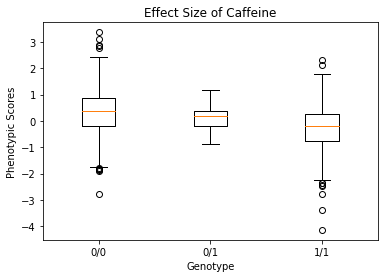

In [24]:
#plot effect size with boxplot
data = [genotype00_scores,genotype01_scores,genotype11_scores]
fig, ax = plt.subplots()             
ax.set_title("Effect Size of Caffeine") 
ax.boxplot(data,labels = ["0/0", "0/1", "1/1"])
plt.xlabel("Genotype")
plt.ylabel("Phenotypic Scores")
#plt.savefig('Caffeine_boxplot.png')
plt.show()